In [1]:
import numpy as np
from numpy import sqrt,exp,cos,sin,pi
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy import constants as c
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import integrate
from scipy import special
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi,cos,exp,hanning
from scipy.fftpack import dct,idct

### 1. Discrete cosine transform

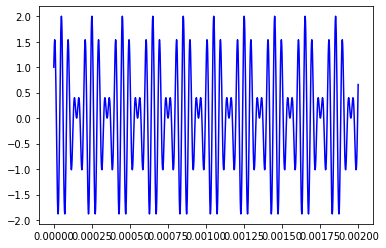

In [2]:
def ffunc(t):
    return sin(2*pi*v1*t)+cos(2*pi*v2*t)

v1 = 25e3
v2 = 20e3
nn = 1000
tau = 2e-6
t = np.linspace(0,(nn-1)*tau,nn)

f = ffunc(t)

plt.plot(t,f,'b')
plt.show()

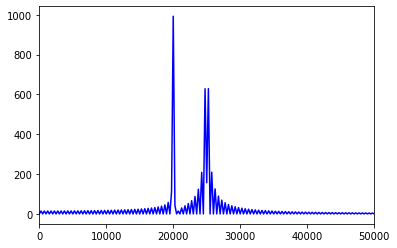

In [3]:
cform = dct(f)
dv = 1/(2*nn*tau)                # frequency spacing in Hz - different by 2 from fft
vk = np.linspace(0,(nn-1)*dv,nn) # array of frequencies (Hz)
plt.plot(vk,abs(cform),'b')
plt.xlim(0,50000)
plt.show()

### 2. Filtering noise

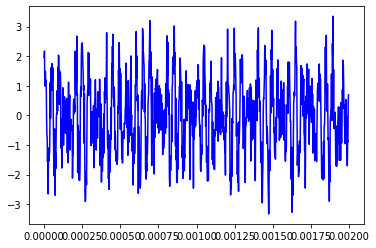

In [4]:
rng = np.random.default_rng()
fnoisy = [f_i + rng.normal(0.,0.7) for f_i in f]

plt.plot(t,fnoisy,'b')
plt.show()

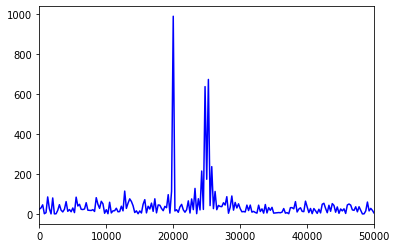

In [5]:
cform = dct(fnoisy)
dv = 1/(2*nn*tau)                # frequency spacing in Hz - different by 2 from fft
vk = np.linspace(0,(nn-1)*dv,nn) # array of frequencies (Hz)
plt.plot(vk,abs(cform),'b')
plt.xlim(0,50000)
plt.show()

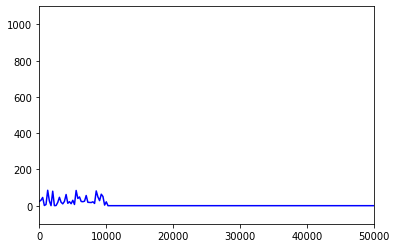

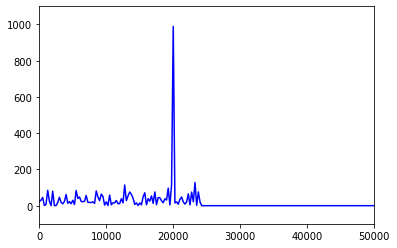

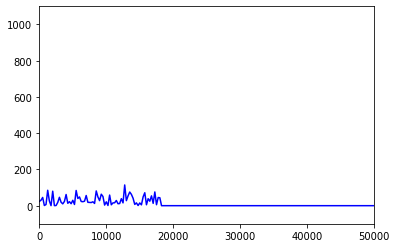

In [6]:
vmax = [10e3,24e3,18e3]
lowpass = np.zeros(len(vk))
for v in vmax:
    for i,k in zip(range(len(vk)),vk):
        if v < k:
            lowpass[i] = 0
        else:
            lowpass[i] = cform[i]
    plt.plot(vk,abs(lowpass),'b')
    plt.xlim(0,50000)
    plt.ylim(-100,1100)
    plt.show()

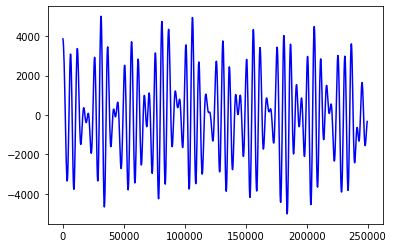

In [7]:
vmax = 30e3
lowpass = np.zeros(len(vk))
for i,k in zip(range(len(vk)),vk):
    if vmax < k:
        lowpass[i] = 0
    else:
        lowpass[i] = cform[i]
invcos = idct(lowpass)
plt.plot(vk,invcos,'b')
plt.show()